<a href="https://colab.research.google.com/github/sujan9945587042/TimeSer/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

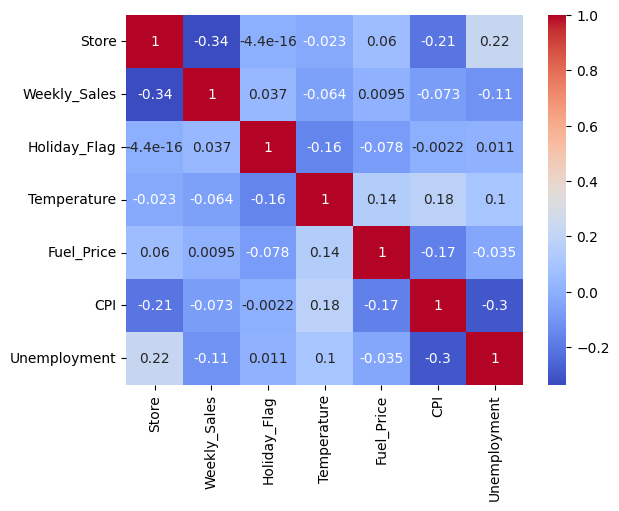

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

In [ ]:
print(df[['Weekly_Sales', 'Unemployment']].corr())

              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


yes the weekly sales are affected by the unemployment


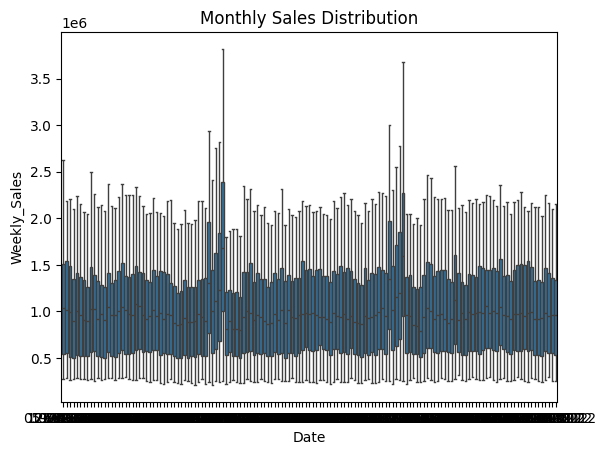

In [ ]:
sns.boxplot(x='Date', y='Weekly_Sales', data=df)
plt.title("Monthly Sales Distribution")
plt.show()

Yess there are some seasonlities present


In [ ]:
print(df[['Weekly_Sales', 'Temperature']].corr())

              Weekly_Sales  Temperature
Weekly_Sales       1.00000     -0.06381
Temperature       -0.06381      1.00000


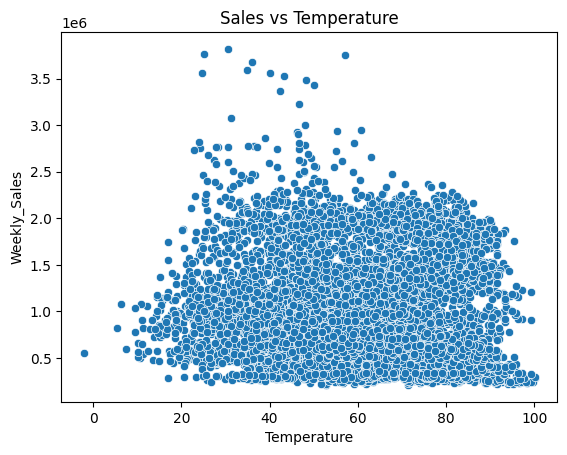

In [ ]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title("Sales vs Temperature")
plt.show()

There is no much affect on weekly sales by the temperature,but there are mild changes due to the cliamte change


In [ ]:
print(df[['Weekly_Sales', 'CPI']].corr())

              Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.072634
CPI              -0.072634  1.000000


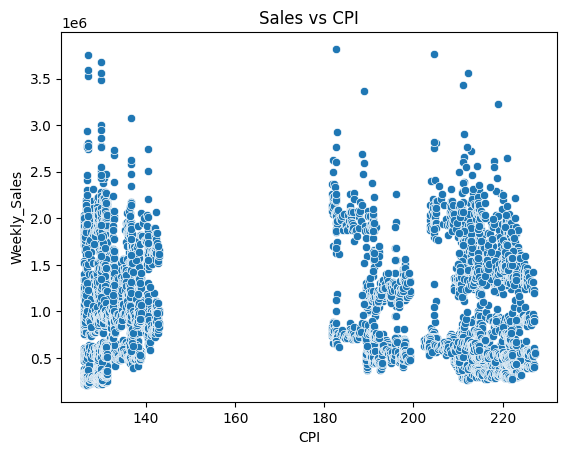

In [ ]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title("Sales vs CPI")
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year

In [ ]:
gap_cpi = df[(df['CPI'] > 140) & (df['CPI'] < 180)]
print("Rows with CPI between 140 and 180:", len(gap_cpi))
print(gap_cpi['Year'].value_counts())

Rows with CPI between 140 and 180: 192
Year
2012    129
2011     63
Name: count, dtype: int64


The cpi data affects the weekly sales as you can see the gap between 140-180 cpi the weekly sales affected largely.
When the cost of consumer goods rises slightly, sales tend to dip — perhaps due to reduced spending.


In [ ]:
top_stores = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print(top_stores.head())

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64


store 20 is the top performing store

In [ ]:
bottom_stores = df.groupby('Store')['Weekly_Sales'].mean().sort_values()
print("Worst Store:", bottom_stores.index[0])
print("Difference:", top_stores.iloc[0] - bottom_stores.iloc[0])

Worst Store: 33
Difference: 1847815.1783216782


store 33 is week performing store

In [ ]:
store20 = df[df['Store']==20]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
store20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 2717 to 2859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   Year          143 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 10.6 KB


In [ ]:
df_total20 = store20.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

In [ ]:
df_total20

,Date,Weekly_Sales
0,2010-02-05,2401395.47
1,2010-02-12,2109107.90
2,2010-02-19,2161549.76
3,2010-02-26,1898193.95
4,2010-03-05,2119213.72
...,...,...
138,2012-09-28,2008350.58
139,2012-10-05,2246411.89
140,2012-10-12,2162951.36
141,2012-10-19,1999363.49


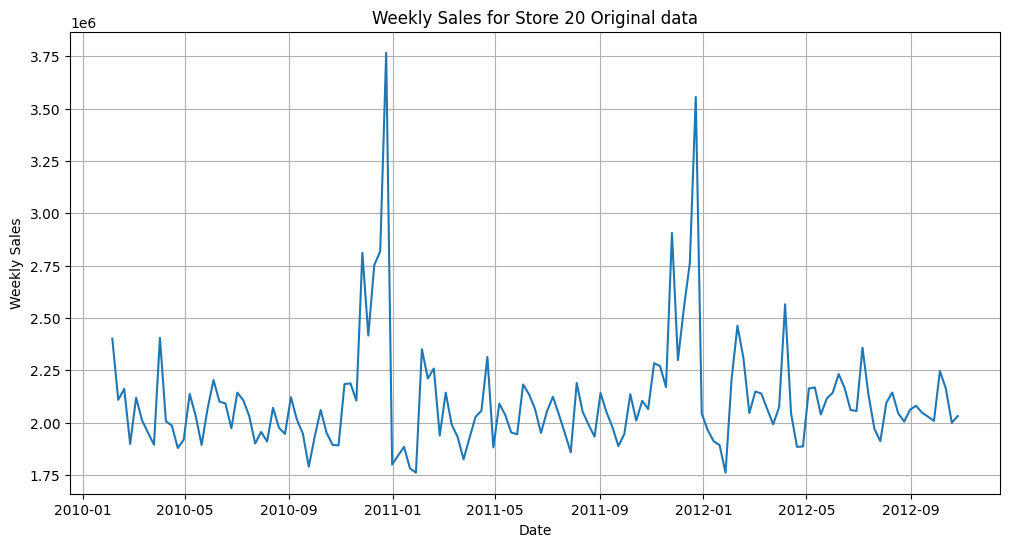

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_total20['Date'], df_total20['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 20 Original data')
plt.grid(True)
plt.show()

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_total20.rename(columns={
    'Date':'ds',
    'Weekly_Sales':'y'
},inplace=True)

In [ ]:
df_total20

,ds,y
0,2010-02-05,2401395.47
1,2010-02-12,2109107.90
2,2010-02-19,2161549.76
3,2010-02-26,1898193.95
4,2010-03-05,2119213.72
...,...,...
138,2012-09-28,2008350.58
139,2012-10-05,2246411.89
140,2012-10-12,2162951.36
141,2012-10-19,1999363.49


In [ ]:
model=Prophet()

In [ ]:
model.fit(df_total20)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/nt_5dfwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/tj8poarz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70930', 'data', 'file=/tmp/tmpm675kgje/nt_5dfwz.json', 'init=/tmp/tmpm675kgje/tj8poarz.json', 'output', 'file=/tmp/tmpm675kgje/prophet_modeloln5dgs7/prophet_model-20250616135311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=108)
forcasted_data=model.predict(future)

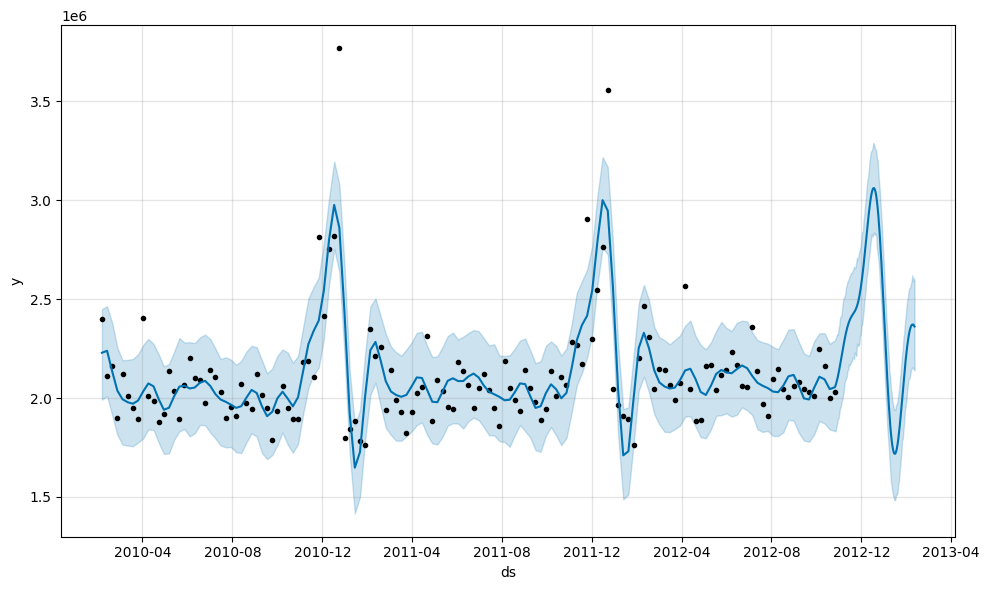

In [ ]:
model.plot(forcasted_data)
plt.show()

**The seasonlity is correctly captured using the prophet model,hence i am procedding with the prophet model itself**

In [ ]:
store7 = df[df['Store']==7]

In [ ]:
store7

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
858,7,2010-02-05,496725.44,0,10.53,2.580,189.381697,9.014,2010
859,7,2010-02-12,524104.92,1,25.90,2.572,189.464272,9.014,2010
860,7,2010-02-19,506760.54,0,27.28,2.550,189.534100,9.014,2010
861,7,2010-02-26,496083.24,0,24.91,2.586,189.601802,9.014,2010
862,7,2010-03-05,491419.55,0,35.86,2.620,189.669505,9.014,2010
...,...,...,...,...,...,...,...,...,...
996,7,2012-09-28,525545.76,0,50.64,3.789,198.590328,7.872,2012
997,7,2012-10-05,505830.56,0,48.43,3.779,198.822132,7.557,2012
998,7,2012-10-12,503463.93,0,41.43,3.760,199.053937,7.557,2012
999,7,2012-10-19,516424.83,0,43.01,3.750,199.148196,7.557,2012


In [ ]:
df_total7 = store7.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
df_total7

,Date,Weekly_Sales
0,2010-02-05,496725.44
1,2010-02-12,524104.92
2,2010-02-19,506760.54
3,2010-02-26,496083.24
4,2010-03-05,491419.55
...,...,...
138,2012-09-28,525545.76
139,2012-10-05,505830.56
140,2012-10-12,503463.93
141,2012-10-19,516424.83


In [ ]:
df_total7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


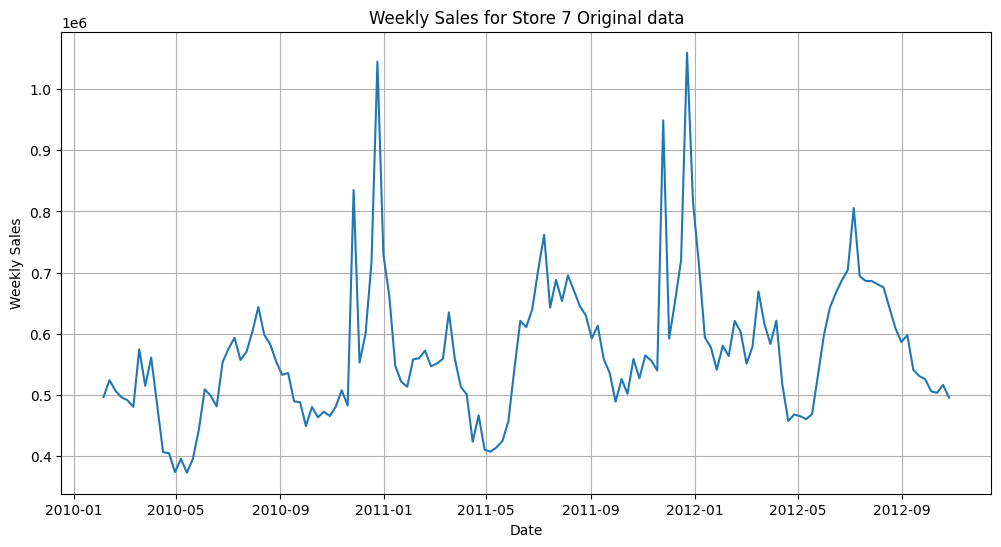

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_total7['Date'], df_total7['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 7 Original data')
plt.grid(True)
plt.show()

In [ ]:
df_total7.rename(columns={
    'Date':'ds',
    'Weekly_Sales':'y'
},inplace=True)

In [ ]:
df_total7

,ds,y
0,2010-02-05,496725.44
1,2010-02-12,524104.92
2,2010-02-19,506760.54
3,2010-02-26,496083.24
4,2010-03-05,491419.55
...,...,...
138,2012-09-28,525545.76
139,2012-10-05,505830.56
140,2012-10-12,503463.93
141,2012-10-19,516424.83


In [ ]:
model=Prophet()

In [ ]:
future=model.fit(df_total7)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/pkgrr8_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/evselp9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61922', 'data', 'file=/tmp/tmpm675kgje/pkgrr8_s.json', 'init=/tmp/tmpm675kgje/evselp9b.json', 'output', 'file=/tmp/tmpm675kgje/prophet_modelo2mngem4/prophet_model-20250616135923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=12)
forcasted_data=model.predict(future)

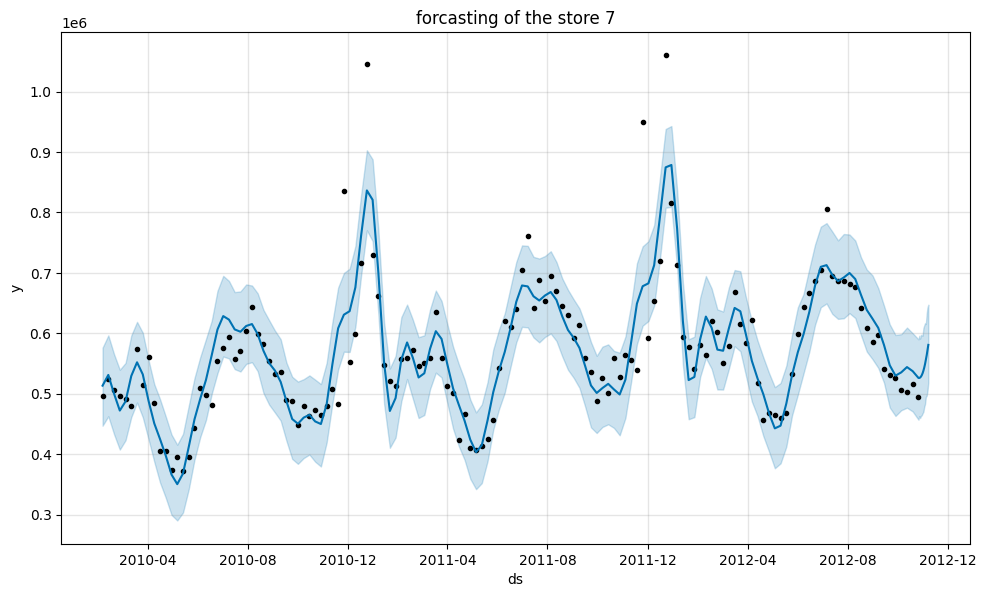

In [ ]:
model.plot(forcasted_data)
plt.title("forcasting of the store 7")
plt.show()


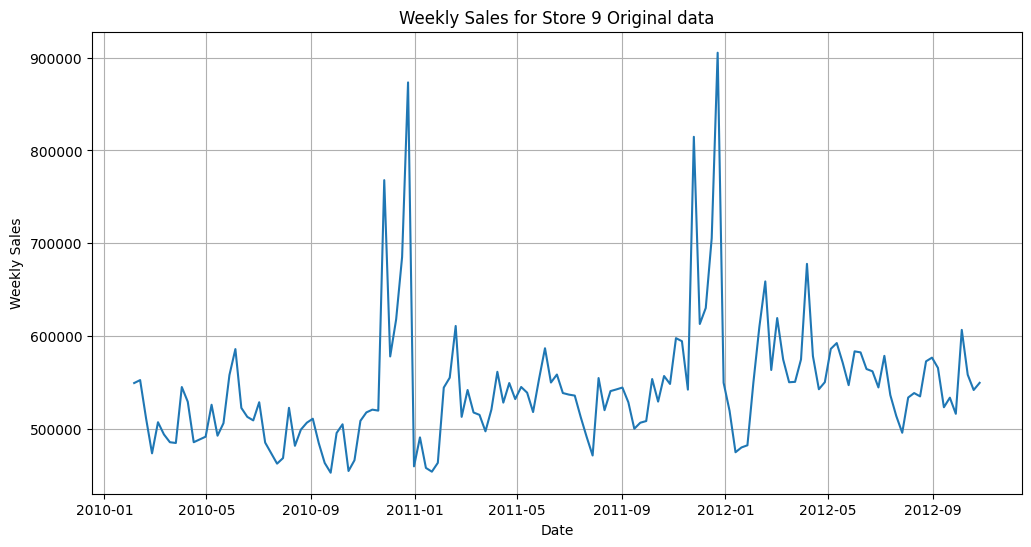

In [ ]:
store9 = df[df['Store']==9]
df_total9 = store9.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_total9['Date'], df_total9['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 9 Original data')
plt.grid(True)
plt.show()



In [ ]:
df_total9.rename(columns={
    'Date':'ds',
    'Weekly_Sales':'y'
},inplace=True)

In [ ]:
df_total9

,ds,y
0,2010-02-05,549505.55
1,2010-02-12,552677.48
2,2010-02-19,511327.90
3,2010-02-26,473773.27
4,2010-03-05,507297.88
...,...,...
138,2012-09-28,516361.06
139,2012-10-05,606755.30
140,2012-10-12,558464.80
141,2012-10-19,542009.46


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/46dybszn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/vmycv8ke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62316', 'data', 'file=/tmp/tmpm675kgje/46dybszn.json', 'init=/tmp/tmpm675kgje/vmycv8ke.json', 'output', 'file=/tmp/tmpm675kgje/prophet_modeleze9ob4p/prophet_model-20250616140939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


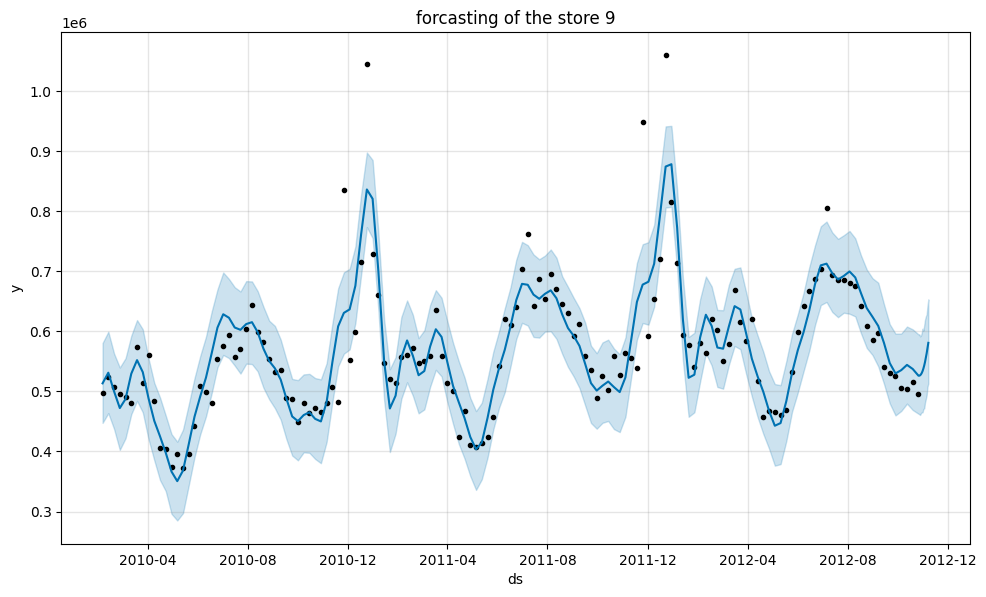

In [ ]:
model=Prophet()
future=model.fit(df_total7)
future=model.make_future_dataframe(periods=12)
forcasted_data=model.predict(future)
model.plot(forcasted_data)
plt.title("forcasting of the store 9")
plt.show()



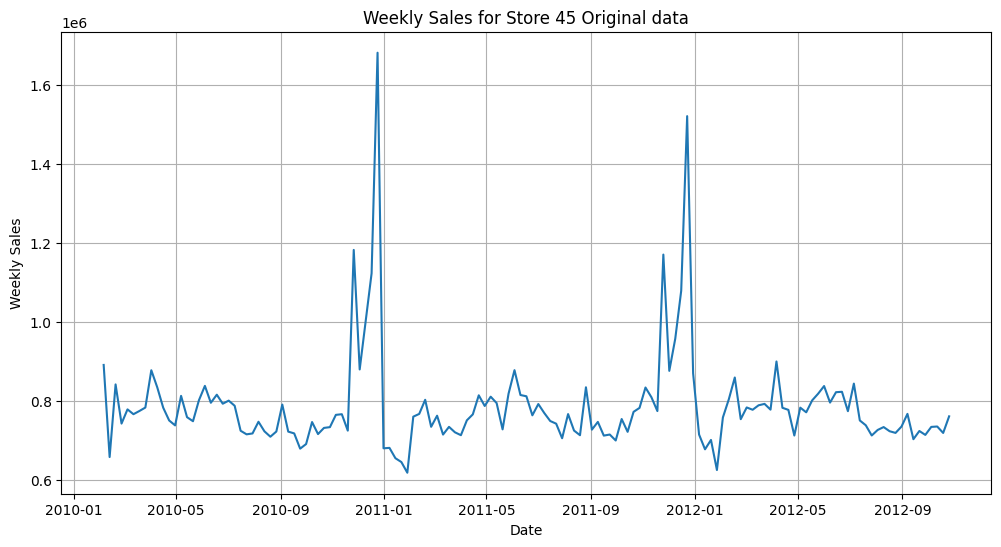

In [ ]:
store45 = df[df['Store']==45]
df_total45 = store45.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_total45['Date'], df_total45['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 45 Original data')
plt.grid(True)
plt.show()

In [ ]:
df_total45.rename(columns={
    'Date':'ds',
    'Weekly_Sales':'y'
},inplace=True)

In [ ]:
df_total45

,ds,y
0,2010-02-05,890689.51
1,2010-02-12,656988.64
2,2010-02-19,841264.04
3,2010-02-26,741891.65
4,2010-03-05,777951.22
...,...,...
138,2012-09-28,713173.95
139,2012-10-05,733455.07
140,2012-10-12,734464.36
141,2012-10-19,718125.53


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/0dk62qli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm675kgje/8fvksoed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36705', 'data', 'file=/tmp/tmpm675kgje/0dk62qli.json', 'init=/tmp/tmpm675kgje/8fvksoed.json', 'output', 'file=/tmp/tmpm675kgje/prophet_model4e6byq6m/prophet_model-20250616141754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


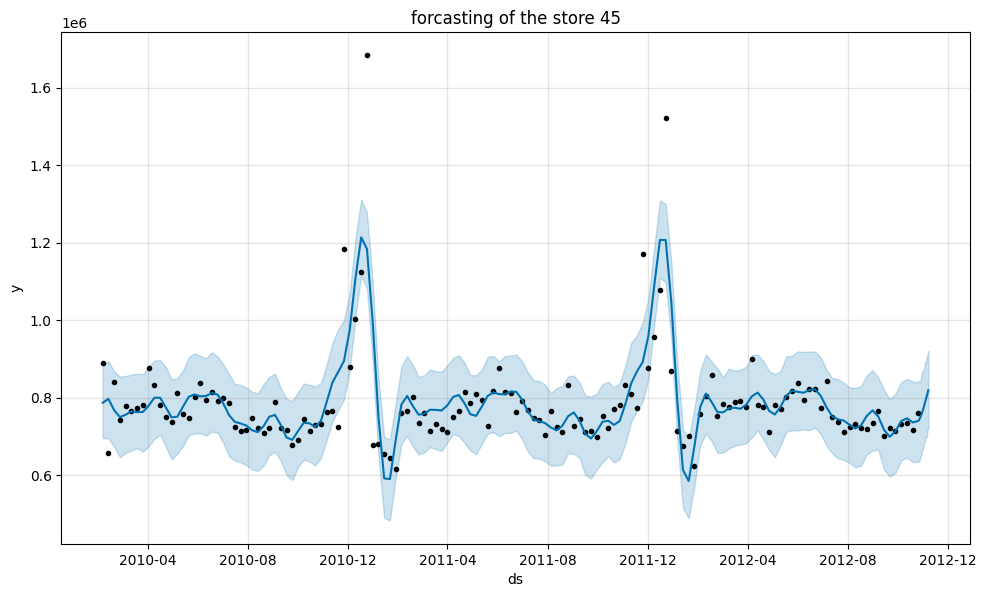

In [ ]:
model=Prophet()
future=model.fit(df_total45)
future=model.make_future_dataframe(periods=12)
forcasted_data=model.predict(future)
model.plot(forcasted_data)
plt.title("forcasting of the store 45")
plt.show()

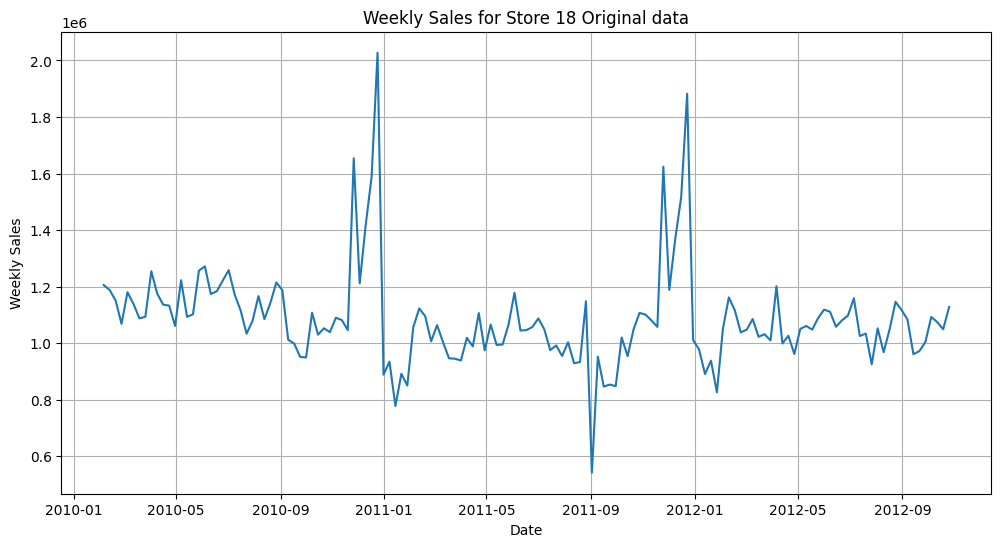

In [ ]:
store18 = df[df['Store']==18]
df_total18 = store18.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_total18['Date'], df_total18['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 18 Original data')
plt.grid(True)
plt.show()

In [ ]:
df_total18.rename(columns={
    'Date':'ds',
    'Weekly_Sales':'y'
},inplace=True)

In [ ]:
df_total18

,ds,y
0,2010-02-05,1205307.50
1,2010-02-12,1187880.70
2,2010-02-19,1150663.42
3,2010-02-26,1068157.45
4,2010-03-05,1179738.50
...,...,...
138,2012-09-28,1002856.20
139,2012-10-05,1092204.79
140,2012-10-12,1074079.00
141,2012-10-19,1048706.75


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4wdrmiz/uozl60rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4wdrmiz/lzo7hy73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48200', 'data', 'file=/tmp/tmp_4wdrmiz/uozl60rq.json', 'init=/tmp/tmp_4wdrmiz/lzo7hy73.json', 'output', 'file=/tmp/tmp_4wdrmiz/prophet_modelw2z769y3/prophet_model-20250617084058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:40:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:40:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


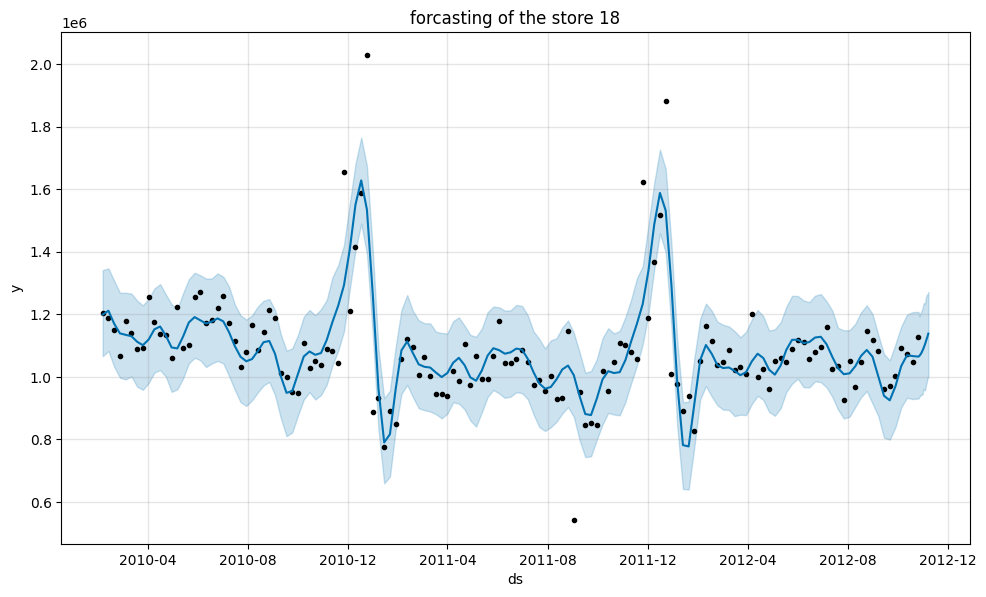

In [ ]:
model=Prophet()
future=model.fit(df_total18)
future=model.make_future_dataframe(periods=12)
forcasted_data=model.predict(future)
model.plot(forcasted_data)
plt.title("forcasting of the store 18")
plt.show()